In [1]:
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import plotly.express as px

### Load data

In [2]:
data = pd.read_csv('billboard_24years_lyrics_spotify_with_genres.csv')

# Remove rows containing NaN values in the 'genre'
data = data.dropna(subset=['genre'])


In [3]:
## Make data frame with all data
data_all = data.copy()

In [4]:
## Make data frame with single entry per songurl
data_single = data.copy()

# Songs that appear more than once in the dataset
duplicated_songurls = data[data.duplicated(subset=['songurl'], keep=False)]['songurl'].unique()

for songurl in duplicated_songurls[:10]:
    rows = data[data['songurl'] == songurl]
    
    # Combine rows by collecting band_singer and url as lists of unique elements
    combined_band_singer = list(rows['band_singer'].unique())
    combined_url = list(rows['url'].unique())

    danceability = rows['danceability'].mean()
    energy = rows['energy'].mean()
    key = rows['key'].mean()
    loudness = rows['loudness'].mean()
    mode = rows['mode'].mean()
    speechiness = rows['speechiness'].mean()
    acousticness = rows['acousticness'].mean()
    instrumentalness = rows['instrumentalness'].mean()
    liveness = rows['liveness'].mean()
    valence = rows['valence'].mean()
    tempo = rows['tempo'].mean()
    duration_ms = rows['duration_ms'].mean()


    # Create a new row with combined information
    new_row = rows.iloc[0].copy()
    new_row['band_singer'] = combined_band_singer
    new_row['url'] = combined_url
    new_row['danceability'] = danceability
    new_row['energy'] = energy
    new_row['key'] = key
    new_row['loudness'] = loudness
    new_row['mode'] = mode
    new_row['speechiness'] = speechiness
    new_row['acousticness'] = acousticness
    new_row['instrumentalness'] = instrumentalness
    new_row['liveness'] = liveness
    new_row['valence'] = valence
    new_row['tempo'] = tempo
    new_row['duration_ms'] = duration_ms

    # Drop the original rows and append the new combined row
    data_single = data_single[data_single['songurl'] != songurl]
    data_single.loc[len(data_single)] = new_row

# Sort data_single by ranking
data_single = data_single.sort_values(by='ranking').reset_index(drop=True)

### Basic statistics

In [5]:
## Basic statistics of genres
df_genres = data_single[data_single['genre'].apply(bool)].reset_index(drop=True)

df_genres['genre'] = (
    df_genres['genre']
      .astype(str)
      .apply(lambda x: [g.strip() for g in x.split(',')] if ',' in x else [x.strip()])
)


Number of artists with genres: 3057
Average number of genres per artist: 2.1995420346745176
Total distinct genres: 327


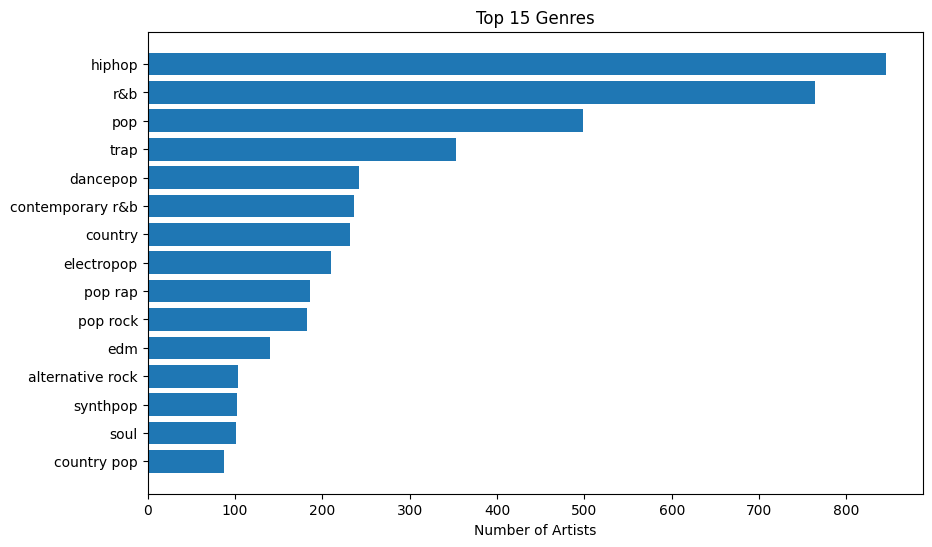

In [6]:

# --- Stats ---
num_artists_with_genres = len(df_genres)
avg_genres_per_artist = sum(len(genres) for genres in df_genres['genre']) / num_artists_with_genres
all_genres = [g for genres in df_genres['genre'] for g in genres]
num_distinct_genres = len(set(all_genres))
genre_counts = Counter(all_genres)

print("Number of artists with genres:", num_artists_with_genres)
print("Average number of genres per artist:", avg_genres_per_artist)
print("Total distinct genres:", num_distinct_genres)

# --- Histogram (top 15 genres) ---
if genre_counts:
    top = genre_counts.most_common(15)
    names, counts = zip(*top)
    plt.figure(figsize=(10,6))
    plt.barh(names[::-1], counts[::-1])
    plt.xlabel("Number of Artists")
    plt.title("Top 15 Genres")
    plt.show()